In [17]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from matplotlib.ticker import AutoMinorLocator
from matplotlib.gridspec import GridSpec
from matplotlib import rc
import matplotlib
import matplotlib.ticker as ticker
import matplotlib.font_manager as fm
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from scipy.stats import genpareto
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [2]:
path = kagglehub.dataset_download("ahmeduzaki/global-earthquake-tsunami-risk-assessment-dataset")
files = os.listdir(path)

csv_file = [f for f in files if f.endswith('.csv')][0]
csv_path = os.path.join(path, csv_file)

df = pd.read_csv(csv_path)

In [3]:
df['Epoch'] = pd.to_datetime(df['Year'].astype('str') + ' ' + df['Month'].astype('str'), format = '%Y %m')

In [4]:
cont = ['magnitude','cdi','mmi','gap','depth']
df[cont].describe(percentiles=[.01,.05,.25,.5,.75,.95,.99]).T

,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max
magnitude,782.0,6.941125,0.445514,6.5,6.5000,6.5,6.600,6.800,7.10,7.8000,8.30,9.10
cdi,782.0,4.333760,3.169939,0.0,0.0000,0.0,0.000,5.000,7.00,9.0000,9.00,9.00
mmi,782.0,5.964194,1.462724,1.0,3.0000,3.0,5.000,6.000,7.00,8.0000,9.00,9.00
gap,782.0,25.038990,24.225067,0.0,0.0000,0.0,14.625,20.000,30.00,55.9895,123.19,239.00
depth,782.0,75.883199,137.277078,2.7,6.3483,10.0,14.000,26.295,49.75,526.9000,624.00,670.81


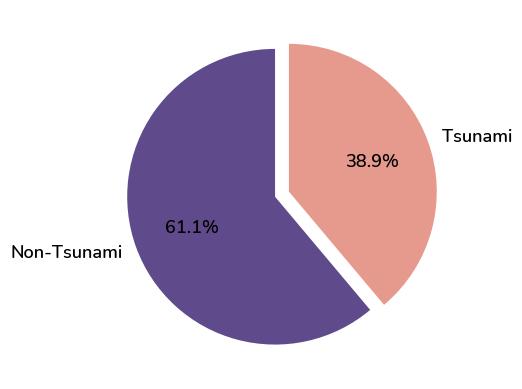

In [5]:
tsunami_counts = df['tsunami'].value_counts()


font_path = r"C:\DATA\misc\Nunito\static\Nunito-SemiBold.ttf"
fm.fontManager.addfont(font_path)
prop = fm.FontProperties(fname=font_path)

params = {
    'mathtext.rm': 'Nunito',
    'font.family': prop.get_name(),
}

matplotlib.rcParams.update(params)

fig, ax = plt.subplots()
ax.pie(tsunami_counts.values, labels=['Non-Tsunami', 'Tsunami'], autopct='%1.1f%%',
           colors=["#5F4B8B", '#E69A8D'], startangle=90, explode=(0.05, 0.05), shadow=False,
           textprops={'fontsize': 13, 'fontweight': 'normal'})
plt.show()


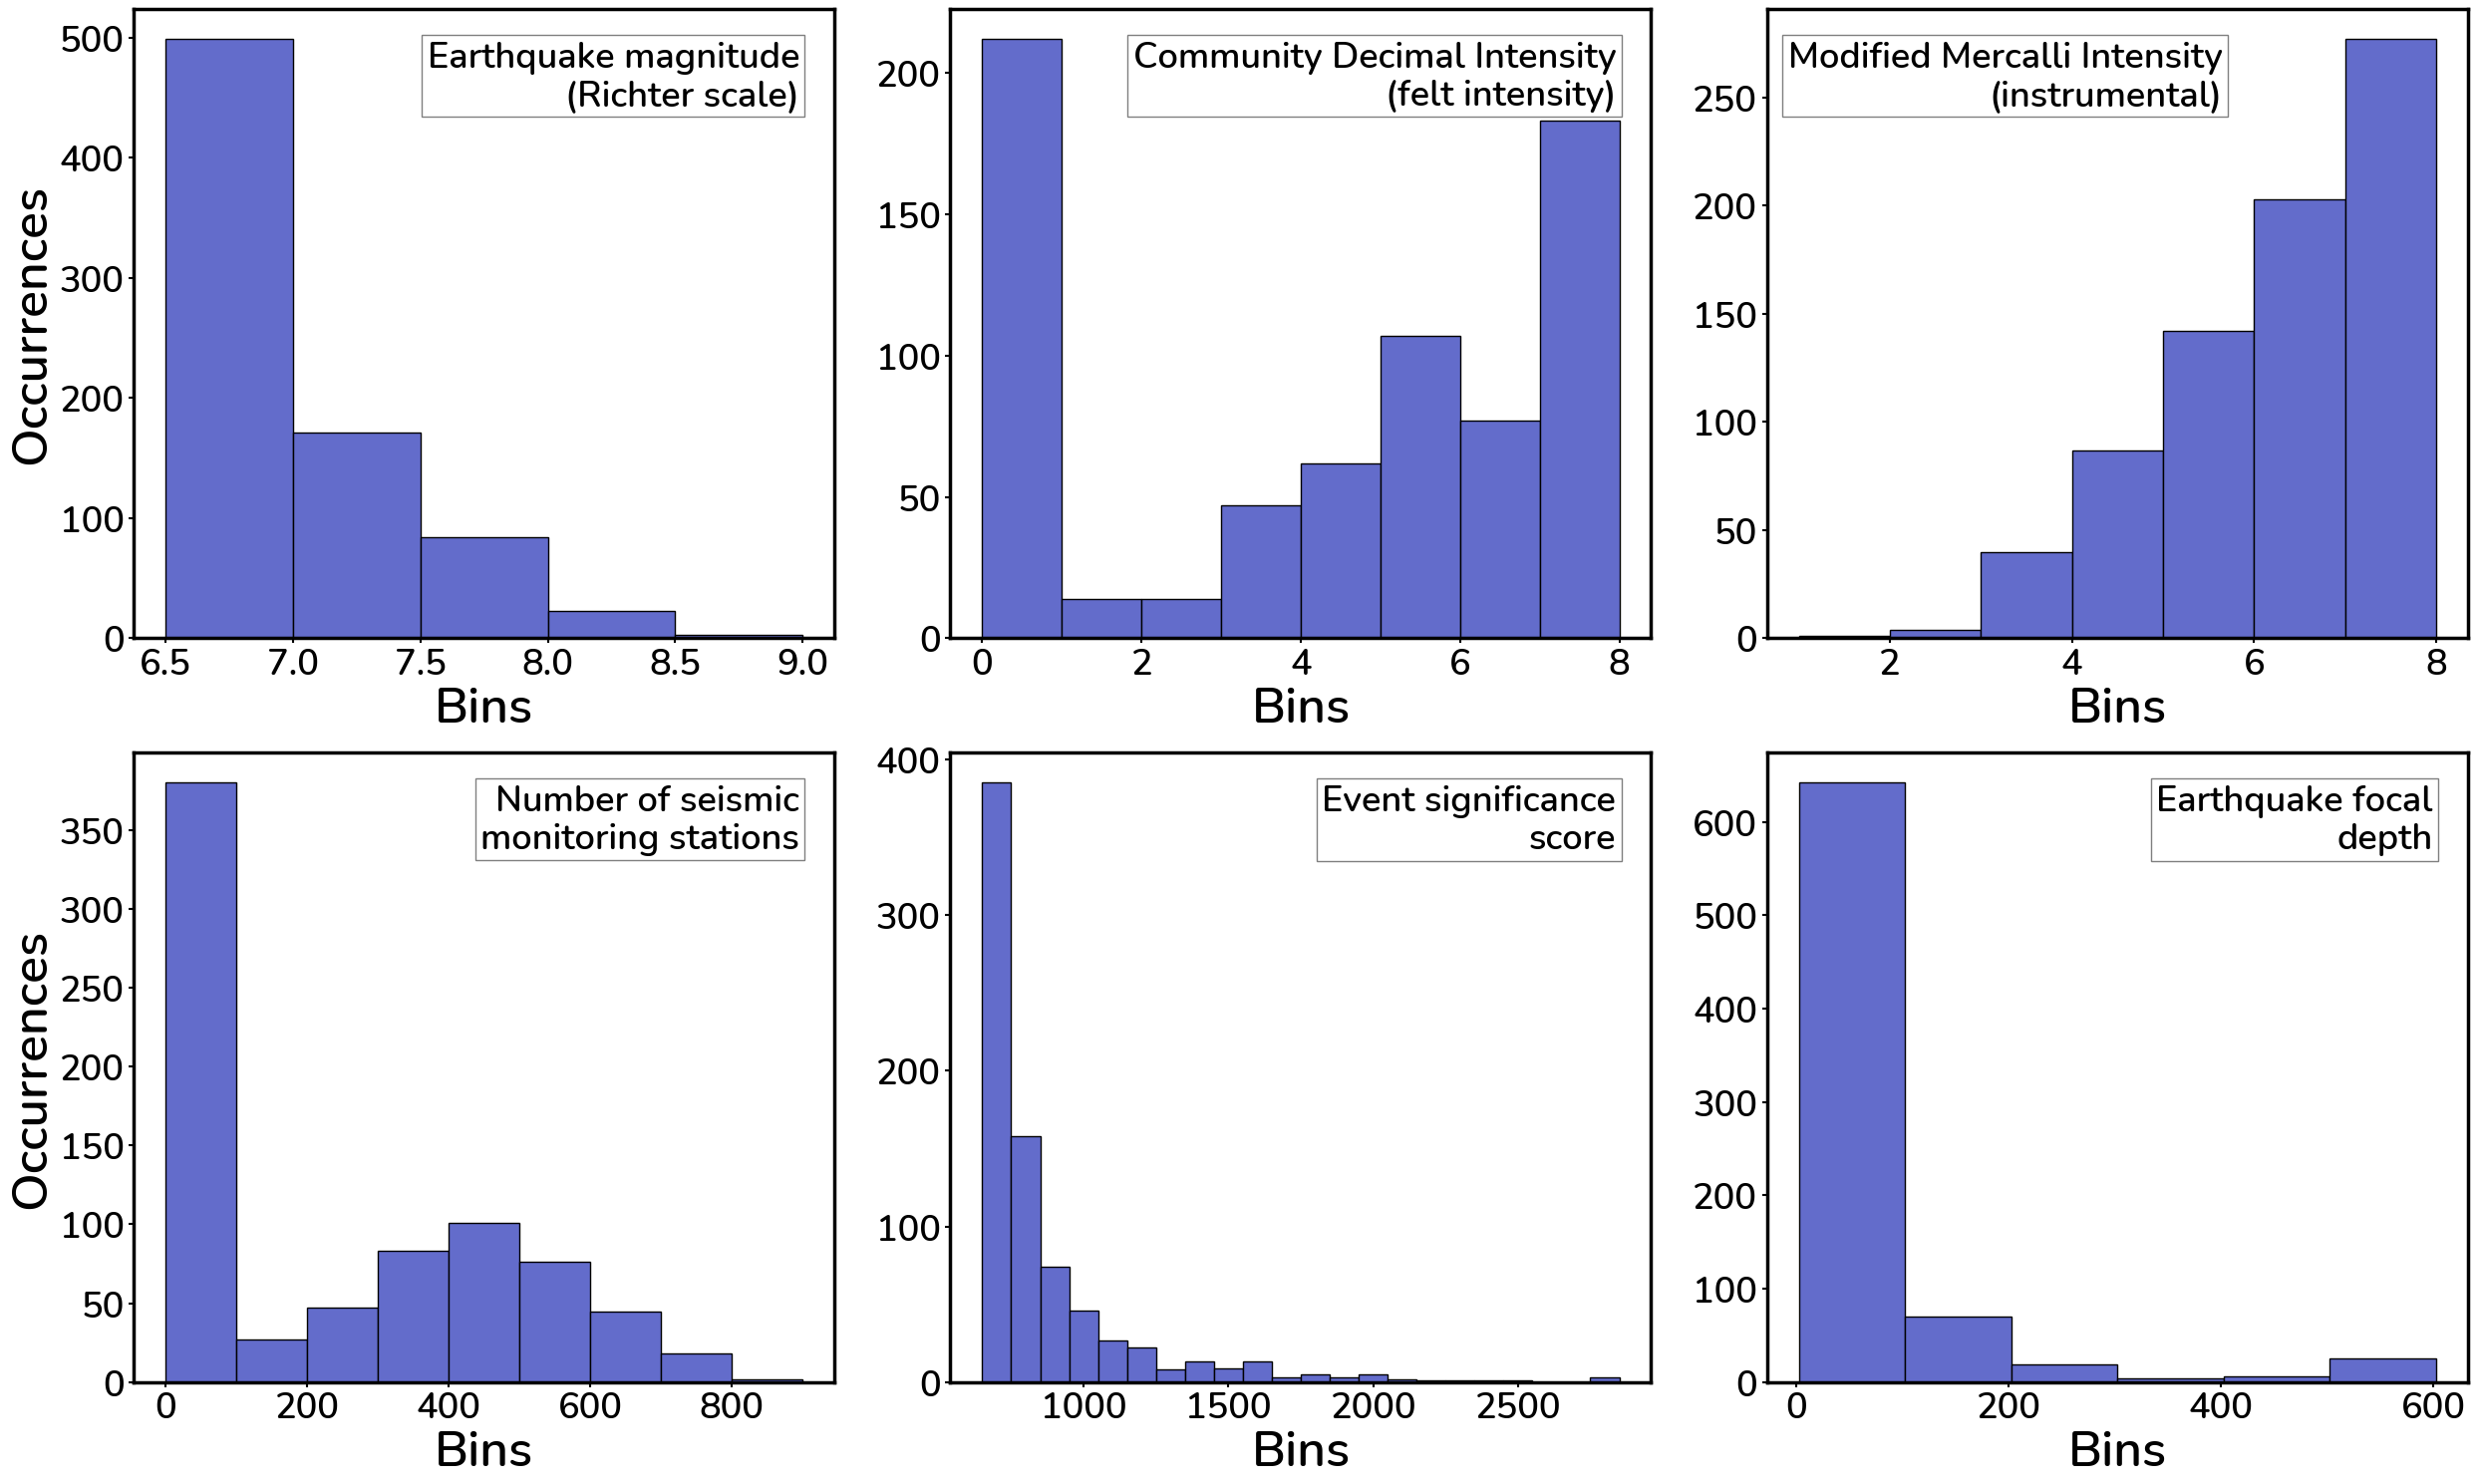

In [6]:
font_path = r"C:\DATA\misc\Nunito\static\Nunito-SemiBold.ttf"
fm.fontManager.addfont(font_path)
prop = fm.FontProperties(fname=font_path)

params = {
    'mathtext.rm': 'Nunito',
    'font.family': prop.get_name(),
}

matplotlib.rcParams.update(params)

fig, ax = plt.subplots(2, 3, figsize=(25, 15))

ax[0,0].hist(df['magnitude'], bins = np.arange(df['magnitude'].min(), df['magnitude'].max(), 0.5), color = '#636CCB', edgecolor='black')
ax[0,0].set_ylabel('Occurrences', fontweight='bold', fontsize=36)
ax[0,0].text(0.95, 0.95, 'Earthquake magnitude\n(Richter scale)',
        transform=ax[0,0].transAxes,
        horizontalalignment='right',
        verticalalignment='top', fontsize = 26,
        bbox=dict(facecolor='none', alpha=0.5))

ax[0,1].hist(df['cdi'], bins = np.arange(df['cdi'].min(), df['cdi'].max(), 1), color = '#636CCB', edgecolor='black')
ax[0,1].text(0.95, 0.95, 'Community Decimal Intensity\n(felt intensity)',
        transform=ax[0,1].transAxes,
        horizontalalignment='right',
        verticalalignment='top', fontsize = 26,
        bbox=dict(facecolor='none', alpha=0.5))


ax[0,2].hist(df['mmi'], bins = np.arange(df['mmi'].min(), df['mmi'].max(), 1), color = '#636CCB', edgecolor='black')

ax[0,2].text(0.65, 0.95, 'Modified Mercalli Intensity\n(instrumental)',
        transform=ax[0,2].transAxes,
        horizontalalignment='right',
        verticalalignment='top', fontsize = 26,
        bbox=dict(facecolor='none', alpha=0.5))

ax[1,0].hist(df['nst'], bins = np.arange(df['nst'].min(), df['nst'].max(), 100), color = '#636CCB', edgecolor='black')
ax[1,0].set_ylabel('Occurrences', fontweight='bold', fontsize=36)
ax[1,0].text(0.95, 0.95, 'Number of seismic\nmonitoring stations',
        transform=ax[1,0].transAxes,
        horizontalalignment='right',
        verticalalignment='top', fontsize = 26,
        bbox=dict(facecolor='none', alpha=0.5))

ax[1,1].hist(df['sig'], bins = np.arange(df['sig'].min(), df['sig'].max(), 100), color = '#636CCB', edgecolor='black')
ax[1,1].text(0.95, 0.95, 'Event significance\nscore',
        transform=ax[1,1].transAxes,
        horizontalalignment='right',
        verticalalignment='top', fontsize = 26,
        bbox=dict(facecolor='none', alpha=0.5))


ax[1,2].hist(df['depth'], bins = np.arange(df['depth'].min(), df['depth'].max(), 100), color = '#636CCB', edgecolor='black')

ax[1,2].text(0.95, 0.95, 'Earthquake focal\ndepth',
        transform=ax[1,2].transAxes,
        horizontalalignment='right',
        verticalalignment='top', fontsize = 26,
        bbox=dict(facecolor='none', alpha=0.5))


for a in np.ravel(ax):
    
    a.set_xlabel('Bins', fontweight='bold', fontsize=36)
    a.spines['bottom'].set_linewidth(2.5)
    a.spines['left'].set_linewidth(2.5)
    a.spines['top'].set_linewidth(2.5)
    a.spines['right'].set_linewidth(2.5)
    a.tick_params(axis='both', which='major', labelsize=26, width=1.5)
    # a.set_xlim(0, 60)

    # a.yaxis.set_major_formatter(ticker.FuncFormatter(myticks))
    # formatter = EngFormatter(useMathText=True)
    # formatter.set_powerlimits((0, 0))
    # a.yaxis.set_major_formatter(formatter)
    for label in a.get_xticklabels() + a.get_yticklabels():
        label.set_fontweight('bold')
        
        
plt.tight_layout(w_pad=3.0)
# plt.savefig('in_out_no_hist_wavelet.png', dpi = 600)
plt.show()

C:\Users\Utkarsh Sharma\AppData\Local\Temp\ipykernel_14264\1112109725.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  depth_tsunami = df.groupby(['depth_category', 'tsunami']).size().unstack(fill_value=0)


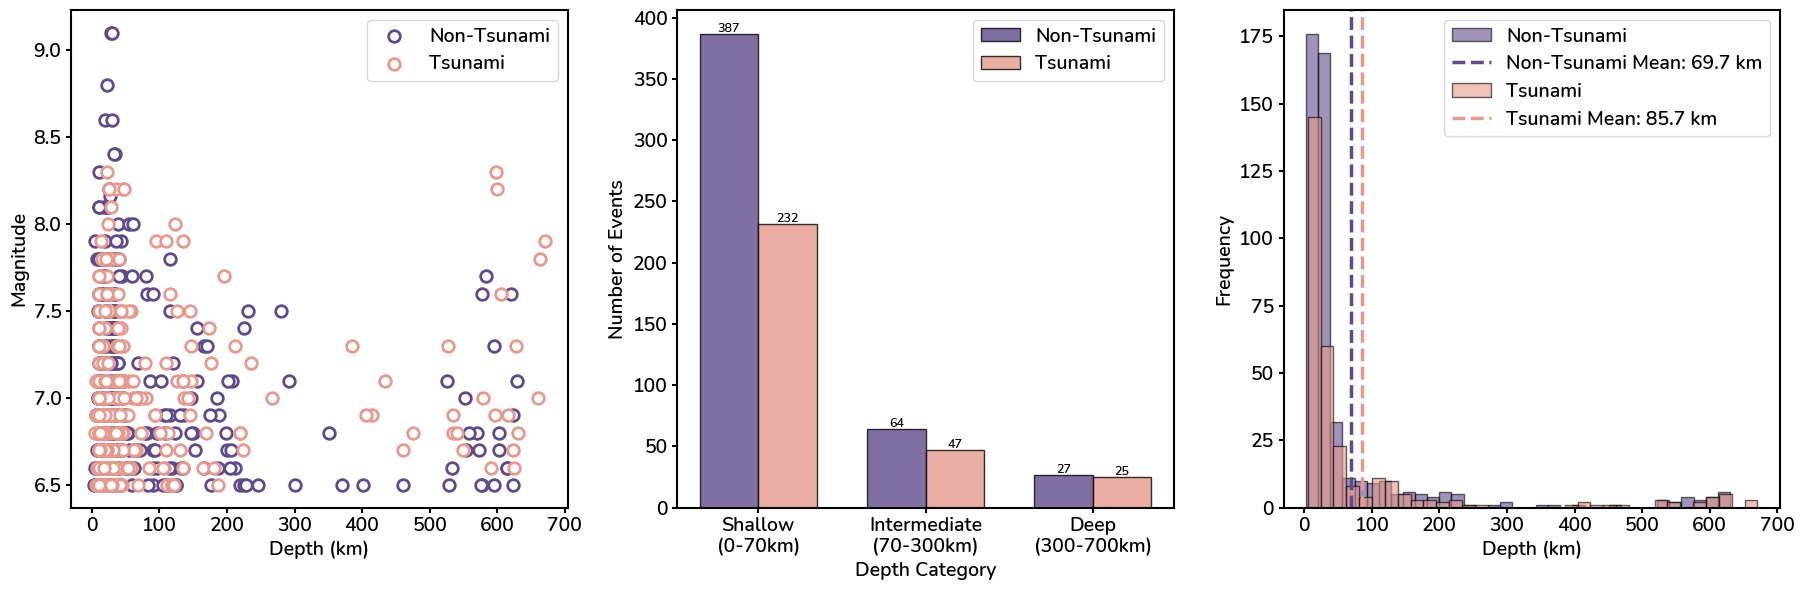

In [7]:
font_path = r"C:\DATA\misc\Nunito\static\Nunito-SemiBold.ttf"
fm.fontManager.addfont(font_path)
prop = fm.FontProperties(fname=font_path)

params = {
    'mathtext.rm': 'Nunito',
    'font.family': prop.get_name(),
}

matplotlib.rcParams.update(params)

fig, ax = plt.subplots(1, 3, figsize=(18, 6))

tsunami_events = df[df['tsunami'] == 1]
non_tsunami_events = df[df['tsunami'] == 0]

ax[0].scatter(non_tsunami_events['depth'], non_tsunami_events['magnitude'], 
                 alpha=1, s=70, c='white', edgecolors='#5F4B8B', linewidth=2, label='Non-Tsunami')
ax[0].scatter(tsunami_events['depth'], tsunami_events['magnitude'],
                 alpha=1, s=70, c='white', edgecolors='#E69A8D', linewidth=2, label='Tsunami')
ax[0].set_ylabel('Magnitude', fontweight='bold', fontsize=14)
ax[0].set_xlabel("Depth (km)", fontweight='bold', fontsize=14)
ax[0].legend(loc='upper right', fontsize=14)
# Top-right: Depth categories
df['depth_category'] = pd.cut(df['depth'], bins=[0, 70, 300, 700], 
                               labels=['Shallow\n(0-70km)', 'Intermediate\n(70-300km)', 'Deep\n(300-700km)'])
depth_tsunami = df.groupby(['depth_category', 'tsunami']).size().unstack(fill_value=0)

x = np.arange(len(depth_tsunami.index))
width = 0.35

bars1 = ax[1].bar(x - width/2, depth_tsunami[0], width, label='Non-Tsunami', 
                      color='#5F4B8B', edgecolor='black', alpha=0.8)
bars2 = ax[1].bar(x + width/2, depth_tsunami[1], width, label='Tsunami',
                      color='#E69A8D', edgecolor='black', alpha=0.8)

ax[1].set_xlabel('Depth Category', fontsize=14, fontweight='bold')
ax[1].set_ylabel('Number of Events', fontsize=14, fontweight='bold')
ax[1].set_xticks(x)
ax[1].set_xticklabels(depth_tsunami.index, fontsize=10)
ax[1].legend(loc='upper right', fontsize=14)
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax[1].text(bar.get_x() + bar.get_width()/2., height,
                      f'{int(height)}', ha='center', va='bottom', fontsize=9, fontweight='bold')

for tsunami_val, label, color in [(0, 'Non-Tsunami', '#5F4B8B'), (1, 'Tsunami', '#E69A8D')]:
    data = df[df['tsunami'] == tsunami_val]['depth']
    ax[2].hist(data, bins=35, alpha=0.6, label=label, color=color, edgecolor='black')
    ax[2].axvline(data.mean(), color=color, linestyle='--', linewidth=2.5,
                      label=f'{label} Mean: {data.mean():.1f} km')

ax[2].set_xlabel('Depth (km)', fontsize=14, fontweight='bold')
ax[2].set_ylabel('Frequency', fontsize=14, fontweight='bold')
# ax[2].set_title('Depth Distribution by Tsunami Status', fontsize=14, fontweight='bold')
ax[2].legend(loc='upper right', fontsize=14)

for a in np.ravel(ax): 
    # a.set_xlabel('Bins', fontweight='bold', fontsize=36)
    a.spines['bottom'].set_linewidth(1.5)
    a.spines['left'].set_linewidth(1.5)
    a.spines['top'].set_linewidth(1.5)
    a.spines['right'].set_linewidth(1.5)
    a.tick_params(axis='both', which='major', labelsize=14, width=1.5)
    # a.set_xlim(0, 60)

    # a.yaxis.set_major_formatter(ticker.FuncFormatter(myticks))
    # formatter = EngFormatter(useMathText=True)
    # formatter.set_powerlimits((0, 0))
    # a.yaxis.set_major_formatter(formatter)
    for label in a.get_xticklabels() + a.get_yticklabels():
        label.set_fontweight('bold')
        
        
plt.tight_layout(w_pad=3.0)

plt.show()

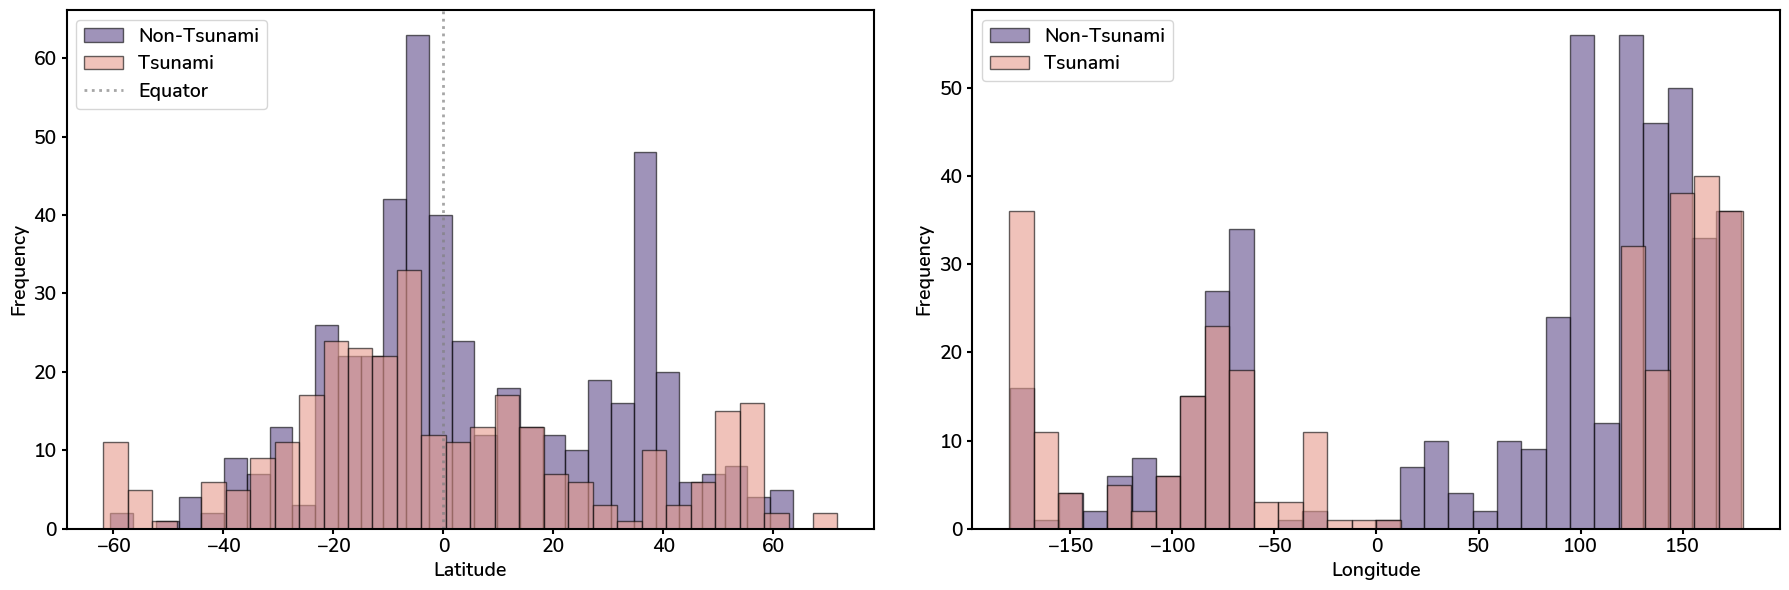

In [8]:
font_path = r"C:\DATA\misc\Nunito\static\Nunito-SemiBold.ttf"
fm.fontManager.addfont(font_path)
prop = fm.FontProperties(fname=font_path)

params = {
    'mathtext.rm': 'Nunito',
    'font.family': prop.get_name(),
}

matplotlib.rcParams.update(params)

fig, ax = plt.subplots(1, 2, figsize=(18, 6))

tsunami_events = df[df['tsunami'] == 1]
non_tsunami_events = df[df['tsunami'] == 0]

for tsunami_val, label, color in [(0, 'Non-Tsunami', '#5F4B8B'), (1, 'Tsunami', '#E69A8D')]:
    data = df[df['tsunami'] == tsunami_val]['latitude']
    ax[0].hist(data, bins=30, alpha=0.6, label=label, color=color, edgecolor='black')
ax[0].axvline(0, color='gray', linestyle=':', linewidth=2, alpha=0.7, label='Equator')   
ax[0].set_xlabel('Latitude', fontsize=14, fontweight='bold')
ax[0].set_ylabel('Frequency', fontsize=14, fontweight='bold')
ax[0].legend(loc='upper left', fontsize=14)

for tsunami_val, label, color in [(0, 'Non-Tsunami', '#5F4B8B'), (1, 'Tsunami', '#E69A8D')]:
    data = df[df['tsunami'] == tsunami_val]['longitude']
    ax[1].hist(data, bins=30, alpha=0.6, label=label, color=color, edgecolor='black')   
ax[1].set_xlabel('Longitude', fontsize=14, fontweight='bold')
ax[1].set_ylabel('Frequency', fontsize=14, fontweight='bold')
ax[1].legend(loc='upper left', fontsize=14)


for a in np.ravel(ax): 
    # a.set_xlabel('Bins', fontweight='bold', fontsize=36)
    a.spines['bottom'].set_linewidth(1.5)
    a.spines['left'].set_linewidth(1.5)
    a.spines['top'].set_linewidth(1.5)
    a.spines['right'].set_linewidth(1.5)
    a.tick_params(axis='both', which='major', labelsize=14, width=1.5)
    # a.set_xlim(0, 60)

    # a.yaxis.set_major_formatter(ticker.FuncFormatter(myticks))
    # formatter = EngFormatter(useMathText=True)
    # formatter.set_powerlimits((0, 0))
    # a.yaxis.set_major_formatter(formatter)
    for label in a.get_xticklabels() + a.get_yticklabels():
        label.set_fontweight('bold')
        
        
plt.tight_layout(w_pad=3.0)

plt.show()

C:\Users\Utkarsh Sharma\anaconda3\Lib\site-packages\cartopy\mpl\feature_artist.py:143: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
C:\Users\Utkarsh Sharma\anaconda3\Lib\site-packages\cartopy\mpl\feature_artist.py:143: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


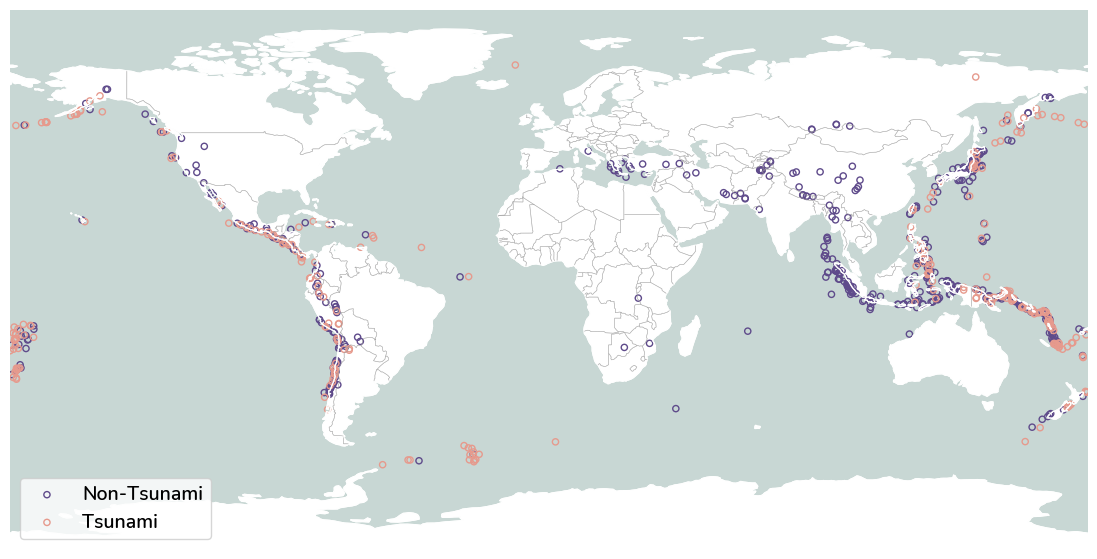

In [9]:
font_path = r"C:\DATA\misc\Nunito\static\Nunito-SemiBold.ttf"
fm.fontManager.addfont(font_path)
prop = fm.FontProperties(fname=font_path)

params = {
    'mathtext.rm': 'Nunito',
    'font.family': prop.get_name(),
}

matplotlib.rcParams.update(params)

fig, ax = plt.subplots(figsize=(14, 7), subplot_kw={'projection': ccrs.PlateCarree()})
for tsunami_val, label, color in [(0, 'Non-Tsunami', '#5F4B8B'), (1, 'Tsunami', '#E69A8D')]:
    data_lat = df[df['tsunami'] == tsunami_val]['latitude']
    data_log = df[df['tsunami'] == tsunami_val]['longitude']
    ax.add_feature(cfeature.COASTLINE, linewidth=0.8, color = '#ffffff')
    ax.add_feature(cfeature.LAND, facecolor='#FFFFFF')
    ax.add_feature(cfeature.OCEAN, facecolor='#C8D7D4')
    ax.add_feature(cfeature.BORDERS, linewidth = 0.4, color = '#9C9C9C', alpha = 0.6)
    ax.set_global()
    ax.scatter(data_log, data_lat, alpha=1, s=20, c = 'none'  , edgecolors= color, linewidth=1, label=label, transform=ccrs.PlateCarree())
    # ax.set_xlabel('Longitude', fontsize=14, fontweight='bold')
    # ax.set_ylabel('Latitude', fontsize=14, fontweight='bold')
    ax.legend(loc='lower left', fontsize=14)
    ax.axis('off')
plt.show()

C:\Users\Utkarsh Sharma\anaconda3\Lib\site-packages\cartopy\mpl\feature_artist.py:143: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
C:\Users\Utkarsh Sharma\anaconda3\Lib\site-packages\cartopy\mpl\feature_artist.py:143: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


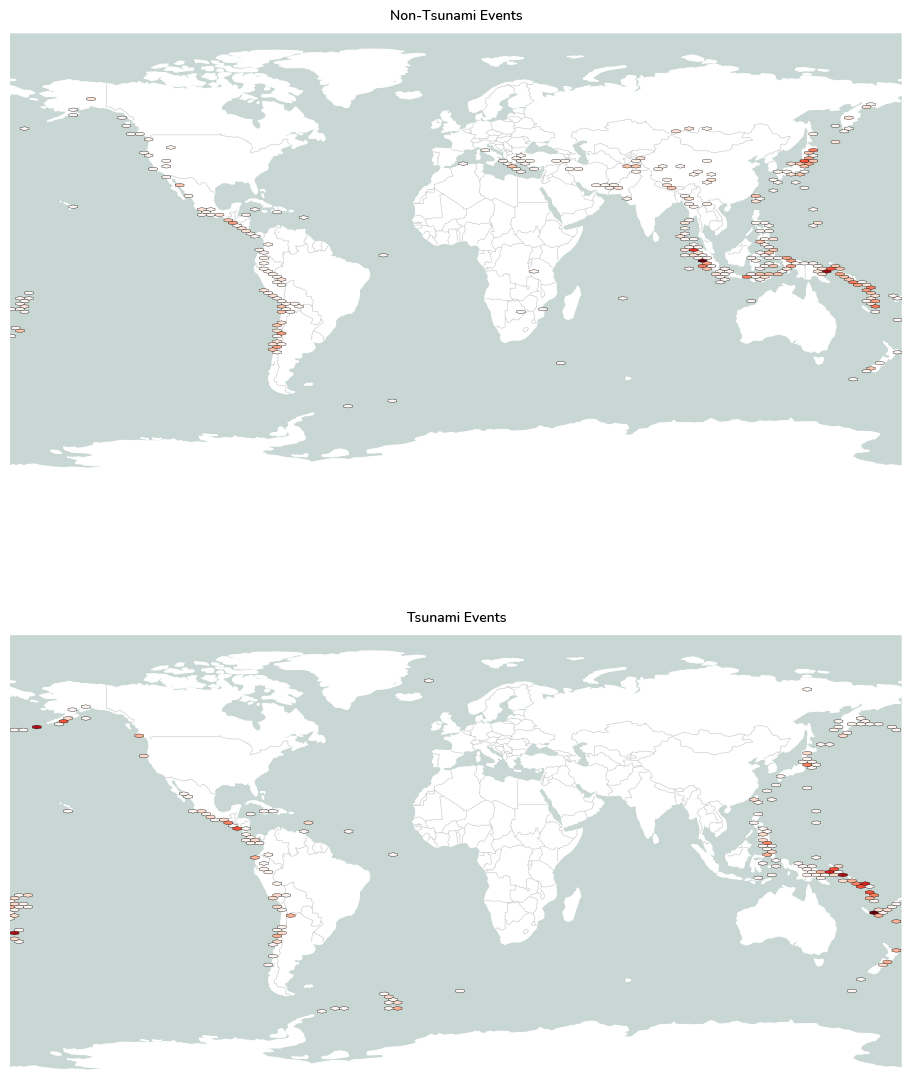

In [12]:
font_path = r"C:\DATA\misc\Nunito\static\Nunito-SemiBold.ttf"
fm.fontManager.addfont(font_path)
prop = fm.FontProperties(fname=font_path)

params = {
    'mathtext.rm': 'Nunito',
    'font.family': prop.get_name(),
}
plt.rcParams.update(params)

categories = [
    (0, 'Non-Tsunami', '#5F4B8B'),
    (1, 'Tsunami', '#E69A8D')
]

fig, axes = plt.subplots(
    2, 1, figsize=(9, 12),
    subplot_kw={'projection': ccrs.PlateCarree()},
    constrained_layout=True
)

for ax, (tsunami_val, label, color) in zip(axes, categories):
    data_lat = df[df['tsunami'] == tsunami_val]['latitude'].values
    data_lon = df[df['tsunami'] == tsunami_val]['longitude'].values

    ax.add_feature(cfeature.LAND, facecolor='#FFFFFF', zorder=0)
    ax.add_feature(cfeature.OCEAN, facecolor='#C8D7D4', zorder=0)
    ax.add_feature(cfeature.COASTLINE, linewidth=0.8, color='#ffffff', zorder=1)
    ax.add_feature(cfeature.BORDERS, linewidth=0.4, color='#9C9C9C', alpha=0.6, zorder=1)

    ax.set_global()
    ax.set_title(f'{label} Events', fontsize=16, fontproperties=prop, pad=10)

    hb = ax.hexbin(
        data_lon, data_lat,
        gridsize=100,
        cmap='Reds',
        mincnt=1,
        edgecolors='black',
        linewidths=0.25,
        transform=ccrs.PlateCarree(),
        zorder=2,
    )

    ax.axis('off')

plt.show()

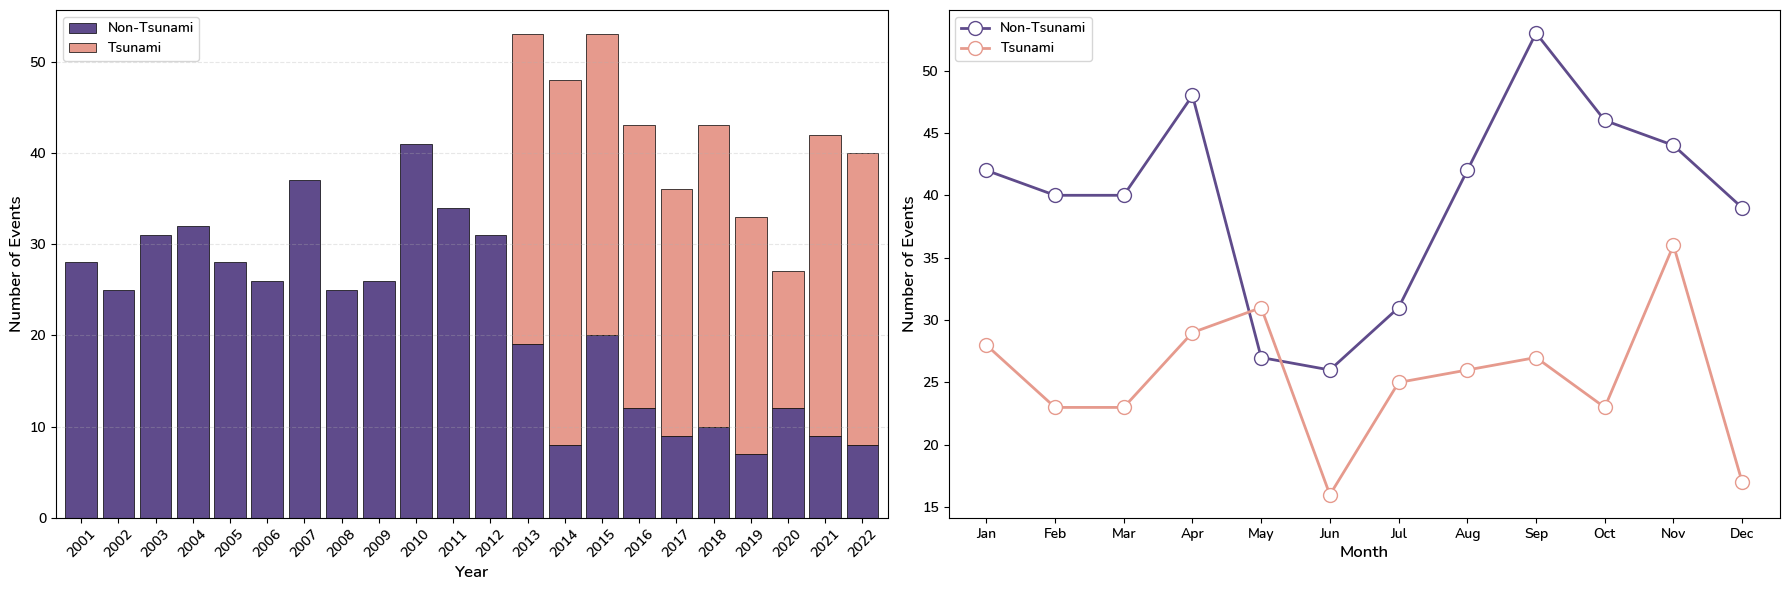

In [11]:
font_path = r"C:\DATA\misc\Nunito\static\Nunito-SemiBold.ttf"
fm.fontManager.addfont(font_path)
prop = fm.FontProperties(fname=font_path)

params = {
    'mathtext.rm': 'Nunito',
    'font.family': prop.get_name(),
}
plt.rcParams.update(params)

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

yearly_data = df.groupby(['Year', 'tsunami']).size().unstack(fill_value=0)
yearly_data.plot(kind='bar', stacked=True, color=['#5F4B8B', '#E69A8D'], ax=axes[0], 
                width=0.85, edgecolor='black', linewidth=0.5)
axes[0].set_xlabel('Year', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Number of Events', fontsize=12, fontweight='bold')
axes[0].legend(['Non-Tsunami', 'Tsunami'], loc='upper left', fontsize=10)
axes[0].grid(alpha=0.3, axis='y', linestyle='--')
axes[0].tick_params(axis='x', rotation=45)

monthly_data = df.groupby(['Month', 'tsunami']).size().unstack(fill_value=0)
colors = ['#5F4B8B', '#E69A8D']
for i, col in enumerate(monthly_data.columns):
    monthly_data[col].plot(
        ax=axes[1],
        marker='o',
        markerfacecolor='white',
        markeredgecolor=colors[i],
        color=colors[i],
        linewidth=2,
        markersize=10,
        label=col)
axes[1].set_xlabel('Month', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Number of Events', fontsize=12, fontweight='bold')
axes[1].set_xticks(range(1, 13))
axes[1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                            'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
axes[1].legend(['Non-Tsunami', 'Tsunami'], loc='upper left', fontsize=10)

plt.tight_layout()
plt.show()


In [14]:
u = float(np.percentile(df['magnitude'].values, 95))
exceed = df[df["magnitude"] > u]["magnitude"].values
n_exc = exceed.size
if n_exc < 15:
    print(f"Warning: only {n_exc} exceedances above u={u:.2f}; results may be unstable.")

In [19]:
y = exceed - u
xi, loc, beta = genpareto.fit(y, floc=0.0)
years_span = (df["Epoch"].max() - df["Epoch"].min()).days / 365.25
lam = n_exc / years_span if years_span > 0 else np.nan
print("=== POT–GPD summary ===")
print(f"Threshold u : {u:.3f}")
print(f"# exceedances : {n_exc}")
print(f"Years span : {years_span:.2f}")
print(f"lambda (/year) : {lam:.4f}")
print(f"xi (shape) : {xi:.4f}")
print(f"beta (scale) : {beta:.4f}")

=== POT–GPD summary ===
Threshold u : 7.800
# exceedances : 37
Years span : 21.83
lambda (/year) : 1.6948
xi (shape) : -0.2388
beta (scale) : 0.4799


In [21]:
def return_period(x):
    if x < u:
        raise ValueError("x must be ≥ threshold u")
    y = x - u
    if beta <= 0 or lam <= 0:
        return np.inf
    if abs(xi) < 1e-12:
        tail_surv = np.exp(-y / beta)  # 1 - G
    else:
        inner = 1 + xi * y / beta
        if inner <= 0:
            return np.inf  # beyond upper bound when xi < 0
        tail_surv = inner ** (-1/xi)
    rate_x = lam * tail_surv
    return np.inf if rate_x <= 0 else 1.0 / rate_x

In [26]:
TARGET_MAG = 9

if TARGET_MAG >= u:
    T = return_period(TARGET_MAG)
    if np.isfinite(T):
        print(f"Estimated return period for M≥{TARGET_MAG}: {T:.1f} years")
    else:
        print(f"M≥{TARGET_MAG} appears beyond the fitted tail ⇒ return period ~ infinite under this model.")
else:
    print(f"Note: TARGET_MAG ({TARGET_MAG}) < u ({u:.2f}). Increase u or set TARGET_MAG ≥ u.")

Estimated return period for M≥9: 26.6 years


In [29]:
df2 = df.dropna(subset=['tsunami',"magnitude",'latitude', 'longitude']).copy()
X = df2[["magnitude",'latitude', 'longitude']].values
y = df2['tsunami'].values

scaler = StandardScaler()
Xz = scaler.fit_transform(X)
clf = LogisticRegression(max_iter=1000, class_weight="balanced")
clf.fit(Xz, y)
proba = clf.predict_proba(Xz)[:,1]
auc = roc_auc_score(y, proba) if len(np.unique(y)) > 1 else float("nan")

print("=== Tsunami model (very simple) ===")
print("Features          : [mag, lon, lat]")
print("Classifier        : LogisticRegression (class_weight=balanced)")
print(f"In-sample AUC     : {auc:.3f}")

=== Tsunami model (very simple) ===
Features          : [mag, lon, lat]
Classifier        : LogisticRegression (class_weight=balanced)
In-sample AUC     : 0.601


In [30]:
def tsunami_prob(mag, lon, lat):
    z = scaler.transform(np.array([[mag, lon, lat]]))
    return float(clf.predict_proba(z)[:,1])

lon0 = float(df['longitude'].median())
lat0 = float(df['latitude'].median())
print(f"P(tsunami | M={TARGET_MAG}, lon≈{lon0:.2f}, lat≈{lat0:.2f}) = {tsunami_prob(TARGET_MAG, lon0, lat0):.3f}")


P(tsunami | M=9, lon≈109.43, lat≈-2.57) = 0.303


C:\Users\Utkarsh Sharma\AppData\Local\Temp\ipykernel_14264\3600768187.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(clf.predict_proba(z)[:,1])
